In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,0.857143,1.000000,0.833333,0.857143,1.000000,0.833333
1,0.666667,0.833333,1.000000,1.000000,0.833333,1.000000
2,0.333333,1.000000,1.000000,0.833333,1.000000,1.000000
3,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.166667,1.000000,0.833333,0.666667,1.000000,0.833333
...,...,...,...,...,...,...
10,0.166667,1.000000,1.000000,0.833333,0.833333,1.000000
11,1.000000,0.666667,0.666667,1.000000,1.000000,0.833333
12,0.666667,0.666667,1.000000,0.666667,0.666667,1.000000
13,0.833333,0.666667,1.000000,0.800000,1.000000,0.833333


In [5]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,3.901546,3.895045,2.847981,2.610729,2.221367,2.004146
1,4.204104,3.881247,2.857391,2.431454,2.153402,2.011266
2,4.843287,3.892569,2.878134,2.449271,2.205467,2.020659
3,4.987641,3.899004,2.842823,2.220965,2.191617,1.837562
4,4.856702,3.808812,2.941760,2.424997,2.174680,1.987001
...,...,...,...,...,...,...
10,3.815464,3.889382,2.869857,2.426343,2.235469,2.027776
11,5.234244,3.932763,2.870845,2.460156,2.220205,2.068720
12,3.978179,3.873972,2.849129,2.465683,2.200791,1.863857
13,4.387909,3.896870,2.861778,2.289757,2.253447,2.044663


In [6]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [7]:
MSE_df.mean()

1.0       4.659265
UV_0.1    4.712100
UV_0.2    4.746393
UV_0.3    4.850397
UV_0.4    4.864521
UV_0.5    4.929179
dtype: float64

In [8]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)     0.649261
UV(0.1)    0.897592
UV(0.2)    0.909907
UV(0.3)    0.893651
UV(0.4)    0.908210
UV(0.5)    0.900657
dtype: float64
Length :
 RRT(1)     4.493448
UV(0.1)    3.927982
UV(0.2)    2.897920
UV(0.3)    2.460935
UV(0.4)    2.217001
UV(0.5)    2.042651
dtype: float64
MSE :
 RRT(1)     4.659265
UV(0.1)    4.712100
UV(0.2)    4.746393
UV(0.3)    4.850397
UV(0.4)    4.864521
UV(0.5)    4.929179
dtype: float64


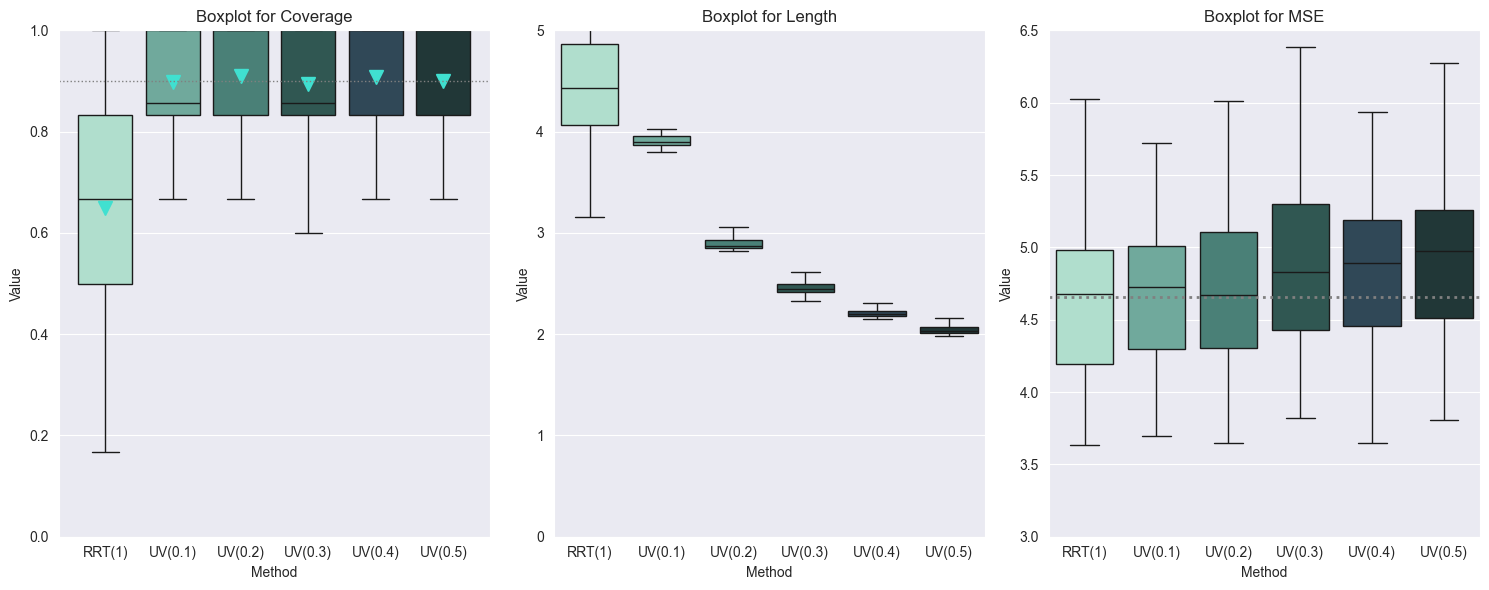

In [9]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=5,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])